# Pythonチャレンジ: 地震データを探る

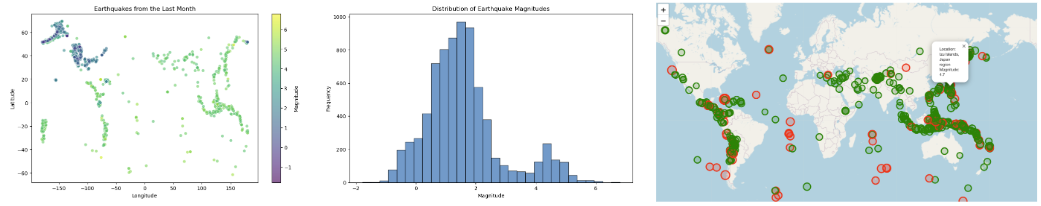

目的: Pythonを使ってUSGS（アメリカ地質調査所）のリアルタイム地震APIから最新の地震データを取得し、意味のある分析を行います。このチャレンジの最終目標は、世界中の地震を視覚化することです。

## 始めに

参考リンク：

- USGS 地震プログラム ホームページ: https://www.usgs.gov/programs/earthquake-hazards/earthquakes
- リアルタイムCSVデータ（スプレッドシート）API: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

データの取得: USGSのリアルタイム地震APIを使用して、最新の地震データを取得します。APIの基本URLは以下の通りです：

https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv

以下のPythonスクリプトを作成して：
- APIにリクエストを送信。
- csv形式のレスポンスを解析し、各地震の位置、マグニチュード、深さ、発生時刻などの情報を抽出します。

### リクエストコード例

In [31]:
import pandas as pd
import requests

# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-11T23:09:11.283Z,31.599000,-104.199000,4.2378,2.10,ml,40.0,68.0,0.10000,0.20,...,2025-11-11T23:13:35.201Z,"49 km NW of Toyah, Texas",earthquake,0.00,0.923039,0.200,28.0,automatic,tx,tx
1,2025-11-11T23:01:25.296Z,61.599700,-151.213800,69.0000,1.80,ml,NaN,NaN,NaN,0.50,...,2025-11-11T23:13:22.725Z,"37 km W of Susitna, Alaska",earthquake,NaN,0.500000,NaN,NaN,automatic,ak,ak
2,2025-11-11T22:44:01.009Z,32.144000,-101.076000,2.7866,2.00,ml,28.0,67.0,0.20000,0.30,...,2025-11-11T22:50:26.044Z,"24 km SSW of Westbrook, Texas",earthquake,0.00,1.290617,0.100,18.0,automatic,tx,tx
3,2025-11-11T22:40:09.430Z,33.964667,-117.218333,12.1200,1.33,ml,56.0,47.0,0.04161,0.18,...,2025-11-11T22:44:12.239Z,"4 km NNE of Moreno Valley, CA",earthquake,0.15,0.360000,0.147,27.0,automatic,ci,ci
4,2025-11-11T22:33:44.820Z,38.789501,-122.757500,2.2900,1.04,md,12.0,79.0,0.01740,0.01,...,2025-11-11T23:12:19.892Z,"1 km N of The Geysers, CA",earthquake,0.28,0.640000,0.230,13.0,automatic,nc,nc


## チャレンジ

**チャレンジ1: データの取得と表示**

APIから地震データを取得し、以下を表示：
- 過去1ヶ月に報告された地震の総数
- 最大マグニチュードの地震とその発生場所と日にち
- 日本での地震の数

**チャレンジ2: 重要な地震のフィルタリング**

- マグニチュードが6.0を超える地震をフィルタリングし、`for` ループを使って以下をリストアップ：
    - その位置、マグニチュード、発生時刻
    - このような重要な地震の総数


**チャレンジ3: 地震の深さを分析**

- すべての地震の平均深度を計算してください。
- 地震を以下のカテゴリに分類し、それぞれの数を数えてください：
    - 浅い地震 (<70 km)
    - 中間深度地震 (70–300 km)
    - 深い地震 (>300 km)


**チャレンジ4: 時間分析**

- 地震のタイムスタンプ（ミリ秒単位のUNIX時間）を人間が読みやすい形式に変換して、日本時間として表示
- データセット内の最も早い地震と最新の地震の発生時刻を見つけてください。

**チャレンジ5: 地震のマグニチュードを視覚化**

- 以下をプロットする棒グラフまたは散布図を作成してください：
    - x軸に地震のマグニチュード。
    - y軸に深さ。
    - 最大の地震と最も深い地震にラベルを追加。

**チャレンジ6（上級）: 地震のグローバルマップ作成**

- foliumまたはmatplotlibなどのマッピングライブラリを使用して、すべての地震を地図上にプロットしてください。
- 以下の特徴を追加してください：
    - 地震の位置をポイントで表示。
    - マグニチュードに基づいてポイントを色分け（例：<4.0は緑、4.0–6.0は黄色、>6.0は赤）。
    - ポイントにマウスを重ねると、地震の位置、マグニチュード、日本日付、深さを表示するツールチップを追加。

# 課題提出

### Theme: Impact Visualization Challenge
USGSのライブ地震データを使って、**Impact** を感じる可視化や分析を作ってください。  
自分で考えて、探して、形にしてください。説明や手順はありません。

---

### How to Begin
1. **VS Code** を開く  
2. 自分の **GitHub「me」リポジトリ** の中に **新しいフォルダ** を作成 → 名前は **Week6**  
3. その中に **earthquake.ipynb** というファイルを作る  
4. **Markdown cell** を追加して、タイトルと自分の作品の説明を書く  
5. **Code cell** を追加し、ライブラリと **USGS データ** をインポートする（授業で使ったコードをコピー）  
6. さらに自分の **code cells** を追加して、可視化や分析を完成させる  

---

### 提出内容
- **Jupyter Notebook (.ipynb)**（code cells と markdown cells を含む）  
- **図または地図**（image または HTML）  
- **日本語サマリー（200〜400字）**：やったこと・わかったこと・感じたこと  

---

### 提出方法
成果物を **GitHub** にコミットし、`.ipynb` への **direct link** を **UNIPA** に提出。  
ファイルのアップロードは禁止。

---

### 評価
- **9–10：素晴らしい**  
- **7–8：ま〜ま〜**  
- **6：ギリOK**  
- **0：未提出**

In [32]:
# === 日本周辺の地震を Folium 地図で表示する（Notebook 用 完全版） ===
# 実行前: Jupyter のセルで !{sys.executable} -m pip install folium pandas requests を実行してください
# または下の try/except ブロックが自動でインストールします。

import sys

# --- 必要ライブラリの確認 / インストール（Notebook 環境に確実に入れる） ---
try:
    import pandas as pd
    import folium
    import requests
    from folium import plugins
    import branca.colormap as cm
except Exception:
    !{sys.executable} -m pip install pandas folium requests
    import pandas as pd
    import folium
    import requests
    from folium import plugins
    import branca.colormap as cm

# --- データの読み込み（CSV URL） ---
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df = pd.read_csv(url)

# 確認
print("読み込んだ全データ件数:", len(df))

# --- 必要なカラムを確認して整える ---
# USGS の CSV には通常: time, latitude, longitude, depth, mag, place, ...
# 欠損を確認し、数値変換
df = df.rename(columns=str.strip)
for c in ["latitude","longitude","mag","depth"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# --- 日本周辺にフィルタ（緯度 20~50, 経度 122~153 および mag があるもの） ---
japan_df = df[
    (df["latitude"] >= 20) & (df["latitude"] <= 50) &
    (df["longitude"] >= 122) & (df["longitude"] <= 153) &
    (df["mag"].notna())
].copy()

print("日本周辺データ件数:", len(japan_df))

# --- 地図の中心とズームレベル ---
center = [36.0, 139.0]    # 日本中央あたり
m = folium.Map(location=center, zoom_start=5, tiles="CartoDB positron")

# --- カラーマップ（マグニチュードに応じて色を付ける） ---
# カラーマップは mag の最小〜最大に合わせる
if len(japan_df) > 0:
    mag_min = float(japan_df["mag"].min())
    mag_max = float(japan_df["mag"].max())
else:
    mag_min, mag_max = 0.0, 6.0

colormap = cm.LinearColormap(['green','yellow','orange','red'], vmin=mag_min, vmax=mag_max)
colormap.caption = 'Magnitude (M)'

# --- マーカー追加（CircleMarker） ---
# マグニチュードに応じて半径を調整し、色を付ける
for idx, row in japan_df.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    mag = row["mag"]
    depth = row.get("depth", None)
    place = row.get("place", "No place")
    time = row.get("time", "")
    # popup を見やすく整形
    popup_html = f"<b>{place}</b><br>Magnitude: {mag}<br>Depth: {depth} km<br>Time: {time}"
    color = colormap(mag) if pd.notna(mag) else "#808080"
    radius = max(3, (mag ** 2) * 0.6)  # mag に応じた見やすいサイズ調整
    folium.CircleMarker(
        location=[lat, lon],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(m)

# --- ヒートマップ（オプション） ---
# ヒートマップを同時に載せたい場合（コメント解除して使う）
# heat_data = [[row["latitude"], row["longitude"], row["mag"]] for _, row in japan_df.iterrows() if pd.notna(row["latitude"]) and pd.notna(row["longitude"])]
# plugins.HeatMap(heat_data, radius=15, blur=10, max_zoom=6).add_to(m)

# --- カラーバーを地図に追加 ---
m.add_child(colormap)

# --- 地図を表示（Notebook 上で表示されます） ---
m

# --- HTML として保存（任意。提出やブラウザ確認用） ---
m.save("earthquake_map_japan.html")
print("earthquake_map_japan.html に保存しました")


読み込んだ全データ件数: 7292
日本周辺データ件数: 95
earthquake_map_japan.html に保存しました


In [35]:
m


In [34]:
from IPython.display import IFrame

# Notebook 内に HTML 地図を直接埋め込んで表示
IFrame("earthquake_map_japan.html", width=800, height=600)
m

USGSサイトの地震データ（CSV）を取得し、緯度経度情報から日本周辺の地震のみを抽出した。foliumを使って地図上に地震の位置と規模をマーカーで表示し、結果をHTMLファイルとして出力・確認した。
太平洋側に多く発生源があり特に東北の近くの海に多く密集している。
大きな地震の発生した近くには他よりも密集して沢山の発生源があったのが確認できた。
このことから大きな地震が起きるときはその周囲で地震が多く発生するのではないか。